In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

MESSY WETHER DATABASE

In [5]:
np.random.seed(42)

cities = ["Karachi", "Lahore", "Islamabad", "Peshawar", "Quetta"]
rows = 120

data = {
    "City": np.random.choice(cities + ["lahore", "KARACHI"], rows),
    "Temperature_C": np.random.choice(
        list(np.random.uniform(5, 45, 100)) + ["30C", "NaN", None], rows
    ),
    "Humidity_%": np.random.choice(
        list(np.random.uniform(20, 90, 100)) + ["85%", None], rows
    ),
    "WindSpeed_kmh": np.random.choice(
        list(np.random.uniform(0, 40, 100)) + ["12kmh", None], rows
    ),
    "Date": pd.date_range("2024-01-01", periods=rows).astype(str)
}

messy_weather = pd.DataFrame(data)
print("Messy Dataset Sample:")
print(messy_weather.head())


Messy Dataset Sample:
        City Temperature_C Humidity_% WindSpeed_kmh        Date
0    KARACHI     19.711325  78.518608      32.90149  2024-01-01
1   Peshawar     35.889791  63.109507     25.175946  2024-01-02
2     Quetta     30.502299  75.705487     15.050383  2024-01-03
3    KARACHI     37.720591  35.107472      0.486179  2024-01-04
4  Islamabad     25.342828  54.413111     38.975792  2024-01-05


DATA CLEANING & STANDARIZE

In [7]:
clean_weather = messy_weather.copy()

# Standardize city names
clean_weather["City"] = clean_weather["City"].str.strip().str.title()

# Clean Temperature
clean_weather["Temperature_C"] = (
    clean_weather["Temperature_C"]
    .astype(str)
    .str.replace("C", "", regex=False)
)
clean_weather["Temperature_C"] = pd.to_numeric(
    clean_weather["Temperature_C"], errors="coerce"
)

# Clean Humidity
clean_weather["Humidity_%"] = (
    clean_weather["Humidity_%"]
    .astype(str)
    .str.replace("%", "", regex=False)
)
clean_weather["Humidity_%"] = pd.to_numeric(
    clean_weather["Humidity_%"], errors="coerce"
)

# Clean Wind Speed
clean_weather["WindSpeed_kmh"] = (
    clean_weather["WindSpeed_kmh"]
    .astype(str)
    .str.replace("kmh", "", regex=False)
)
clean_weather["WindSpeed_kmh"] = pd.to_numeric(
    clean_weather["WindSpeed_kmh"], errors="coerce"
)

# Convert Date column
clean_weather["Date"] = pd.to_datetime(clean_weather["Date"], errors="coerce")

# Handle missing values (fill with mean)
clean_weather.fillna(clean_weather.mean(numeric_only=True), inplace=True)

print("\nCleaned Dataset Info:")
print(clean_weather.info())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   City           120 non-null    object        
 1   Temperature_C  120 non-null    float64       
 2   Humidity_%     120 non-null    float64       
 3   WindSpeed_kmh  120 non-null    float64       
 4   Date           120 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.8+ KB
None


EXPLORATORY DATA ANALYSIS

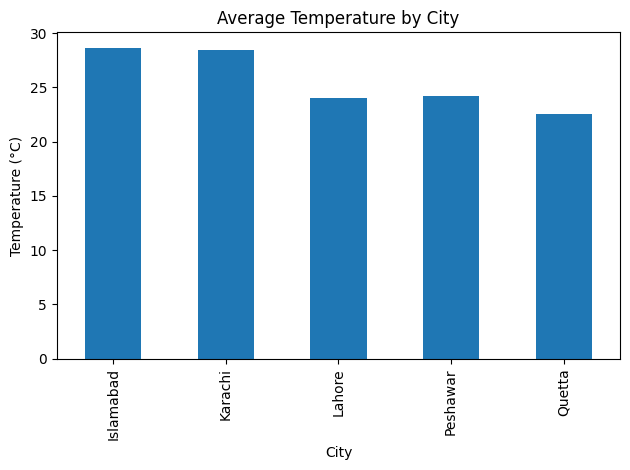

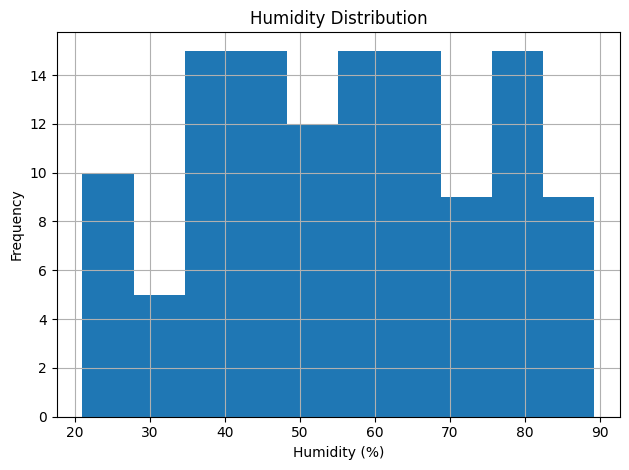

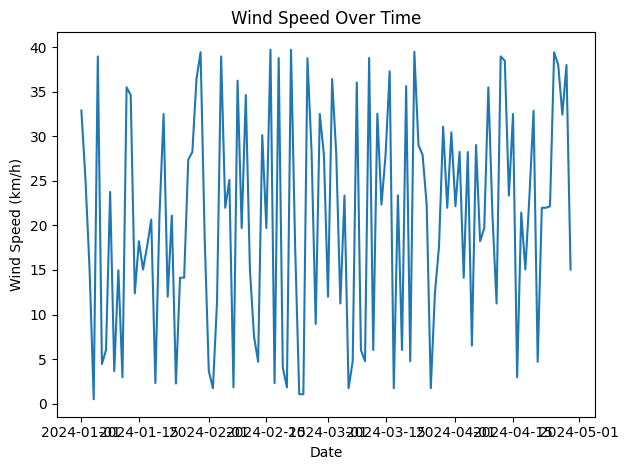

In [8]:
# Average Temperature by City
avg_temp = clean_weather.groupby("City")["Temperature_C"].mean()

plt.figure()
avg_temp.plot(kind="bar")
plt.title("Average Temperature by City")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

# Humidity Distribution
plt.figure()
clean_weather["Humidity_%"].hist()
plt.title("Humidity Distribution")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Wind Speed Over Time
plt.figure()
plt.plot(clean_weather["Date"], clean_weather["WindSpeed_kmh"])
plt.title("Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.tight_layout()
plt.show()





SAVE CLEAN DATA SET

In [9]:
clean_weather.to_csv("clean_weather.csv", index=False)
print("\nclean_weather.csv has been saved successfully!")



clean_weather.csv has been saved successfully!
